Classifying videos into categories using only description and tags.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
# Append the directory to your python path using os
os.chdir('/content/drive/MyDrive/Youtube_video_classifier')

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("youtube_data.csv")

In [ ]:
df.head()

,Unnamed: 0,video_id,category_Id,category,category_label,title,description,tags,viewCount,likeCount,dislikeCount,commentCount,video_comments
0,0,-8VfKZCOo_I,10,music,0,Camila Cabello - Bam Bam (Official Music Video...,Camila Cabello feat. Ed Sheeran - Bam Bam (Off...,"['Camila', 'camila Cabello', 'pop', 'new music...",172006241,1980187,0,38393,['The MV went from dark lighting towards brigh...
1,459,p2Rch6WvPJE,10,music,0,Toni Braxton - Un-Break My Heart (Official HD ...,"""Un-Break My Heart"" by Toni Braxton\nListen to...","['toni braxton', 'toni braxton unbreak my hear...",760358705,3415138,0,81006,['The song is 20 years old yet still more beau...
2,460,SA7AIQw-7Ms,10,music,0,G-Eazy & Halsey - Him & I (Official Video),New Album ‘The Beautiful & Damned’ Available E...,"['BPG/RVG/RCA Records', 'G-Eazy Halsey', 'Him'...",715230930,5542490,0,95099,"[""Let's be honest this song ruled the world at..."
3,462,nOI67IDlNMQ,10,music,0,지민 (Jimin) 'Like Crazy' Official MV,지민 (Jimin) 'Like Crazy' Official MV\n\n'FACE' ...,"['HYBE', 'HYBE LABELS', '하이브', '하이브레이블즈']",115791283,4050521,0,434024,['This album is amazing. \n\nThank you for you...
4,463,U0CGsw6h60k,10,music,0,Rihanna - What's My Name? ft. Drake,REMASTERED IN HD!\nGet Rihanna’s eighth studio...,"['RIHANNA', 'RIHANNA WHAT’S MY NAME', 'WHAT’S ...",1003277066,3400298,0,180398,['This woman raised a whole generation with he...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6795 entries, 0 to 6794
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      6795 non-null   int64 
 1   video_id        6795 non-null   object
 2   category_Id     6795 non-null   int64 
 3   category        6795 non-null   object
 4   category_label  6795 non-null   int64 
 5   title           6795 non-null   object
 6   description     6263 non-null   object
 7   tags            5410 non-null   object
 8   viewCount       6795 non-null   int64 
 9   likeCount       6795 non-null   int64 
 10  dislikeCount    6795 non-null   int64 
 11  commentCount    6795 non-null   int64 
 12  video_comments  5787 non-null   object
dtypes: int64(7), object(6)
memory usage: 690.2+ KB


In [ ]:
#removing rows which have no description at all
df.dropna(subset=["description"],inplace=True)
df.reset_index(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6263 entries, 0 to 6262
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           6263 non-null   int64 
 1   Unnamed: 0      6263 non-null   int64 
 2   video_id        6263 non-null   object
 3   category_Id     6263 non-null   int64 
 4   category        6263 non-null   object
 5   category_label  6263 non-null   int64 
 6   title           6263 non-null   object
 7   description     6263 non-null   object
 8   tags            5367 non-null   object
 9   viewCount       6263 non-null   int64 
 10  likeCount       6263 non-null   int64 
 11  dislikeCount    6263 non-null   int64 
 12  commentCount    6263 non-null   int64 
 13  video_comments  5288 non-null   object
dtypes: int64(8), object(6)
memory usage: 685.1+ KB


In [ ]:
# Splitting data into test and training set
from sklearn.model_selection import train_test_split
train_data , test_data = train_test_split(df,test_size=0.15,random_state=0,stratify=df["category_label"])

In [ ]:
test_data.to_csv('test_data.csv')

In [ ]:
train_data

,index,Unnamed: 0,video_id,category_Id,category,category_label,title,description,tags,viewCount,likeCount,dislikeCount,commentCount,video_comments
712,731,1081,M1dQ2DV9UF4,17,sports,1,Karate Drama || Annual Sports Meet || 25th Jan...,▪︎Karate Drama▪︎\n▪︎ANNUAL SPORTS MEET ▪︎\n▪︎2...,"['ninja nikhil', 'nikhil rao', 'ninja kids', '...",416,27,0,0,NaN
6084,6559,6119,T0gUS_YZZJs,19,other,8,Amadeus Corporate Travel Network 2014 Event Hi...,We are pleased to share with you a short video...,['Amadeus IT Group (Business Operation)'],680,4,0,0,[]
5376,5620,971,5WRV_7m63j0,22,other,8,The sports day of our school/essay writing in ...,The sports day of our school/essay writing in ...,"['AJ pathshala', 'sports day of our school ess...",86966,0,0,0,NaN
4492,4703,6281,JN8FM1NCOSk,25,news and politics,6,"From Jesus to Christ: The First Christians, Pa...",Part one of FRONTLINE’s four-hour series on th...,NaN,11545259,68350,0,11001,['As a Muslim and a follower of Islam I show m...
4727,4939,4637,tyVg12qhNmo,25,news and politics,6,"U.S.: Alex Murdaugh guilty of murdering wife, ...","After only three hours of deliberation, a jury...","['alex murdaugh guilty', 'alex murdaugh', 'mur...",2515,28,0,6,"['After prison is hell', 'JaJ?']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,3439,1954,eJt1DqS57e8,24,entertainment,5,"Live Reading Class, Learn to Read, Learn New W...",Click here to subscribe to my channel and cli...,"['learn to read', 'live reading class', 'readi...",452,41,0,13,"[""Thank you so much for helping adults that ca..."
4777,4989,4515,HhaKuATVqu8,25,news and politics,6,Hamas Fighter Shoots At Israeli Soldiers Throu...,This body cam video allegedly shows Hamas-affi...,"['gaza strip', 'israel war', 'hamas militants'...",2546989,22810,0,5593,['This attack in the school resulted in the ki...
758,793,1014,i0fJQ1fj3bE,17,sports,1,Bangladesh vs New Zealand Highlights | 2nd Tes...,Bangladesh vs New Zealand Highlights | 2nd Tes...,"['gtv live', 'rabbithole live', 'cricket live'...",622505,9280,0,758,"['Glen Philips is literally ""John Cena"" for Ba..."
2050,2144,1679,jqzbjRGzaxU,27,education,3,Write a short essay on Sports and Games | Essa...,#Sports #SportsAndGames #Preparestudies #Handw...,"['essay on importance of games and sports', 'e...",89706,957,0,34,"['Thank you so much❤❤❤❤❤❤😊😊', 'Very nice tomor..."


In [ ]:
train_data["category"].value_counts()

education            1096
entertainment         999
other                 805
film/animation        564
music                 561
news and politics     462
gaming                326
comedy                278
sports                232
Name: category, dtype: int64

In [ ]:
test_data["category"].value_counts()

education            194
entertainment        176
other                142
film/animation       100
music                 99
news and politics     82
gaming                57
comedy                49
sports                41
Name: category, dtype: int64

In [ ]:
#Extracting only required columns
def extract_columns(df):
  data = df[["category","category_label","description","tags"]]
  return data
train_data=extract_columns(train_data)
train_data.head()

,category,category_label,description,tags
712,sports,1,▪︎Karate Drama▪︎\n▪︎ANNUAL SPORTS MEET ▪︎\n▪︎2...,"['ninja nikhil', 'nikhil rao', 'ninja kids', '..."
6084,other,8,We are pleased to share with you a short video...,['Amadeus IT Group (Business Operation)']
5376,other,8,The sports day of our school/essay writing in ...,"['AJ pathshala', 'sports day of our school ess..."
4492,news and politics,6,Part one of FRONTLINE’s four-hour series on th...,NaN
4727,news and politics,6,"After only three hours of deliberation, a jury...","['alex murdaugh guilty', 'alex murdaugh', 'mur..."


Preprocessing the data

In [ ]:
s=train_data["description"][1] + train_data["tags"][1]
s

'"Un-Break My Heart" by Toni Braxton\nListen to Toni Braxton: https://ToniBraxton.lnk.to/listenYD\n\nSubscribe to the official Toni Braxton YouTube channel: https://ToniBraxton.lnk.to/subscribeYD\n\nWatch more videos by Toni Braxton: https://ToniBraxton.lnk.to/listenYD/youtube\n\nFollow Toni Braxton\nWebsite: https://ToniBraxton.lnk.to/followWI\nFacebook: https://ToniBraxton.lnk.to/followFI\nTwitter: https://ToniBraxton.lnk.to/followTI\nInstagram: https://ToniBraxton.lnk.to/followII\nSpotify: https://ToniBraxton.lnk.to/followSI\n\nLyrics:\nUn-break my heart\nSay you\'ll love me again\nUndo this hurt you caused\nWhen you walked out the door\nAnd walked out of my life\nUn-cry these tears\nI cried so many nights\nUn-break my heart\nMy heart\n\n#ToniBraxton #UnBreakMyHeart #OfficialMusicVideo #HD #Remastered[\'toni braxton\', \'toni braxton unbreak my heart\', \'toni braxton unbreak my heart lyrics\', \'toni braxton songs\', \'tony braxton\', \'unbreak my heart toni braxton lyrics\', \'bre

In [ ]:
import re
s=re.sub(r'http\S+', '', s)
s

'"Un-Break My Heart" by Toni Braxton\nListen to Toni Braxton: \n\nSubscribe to the official Toni Braxton YouTube channel: \n\nWatch more videos by Toni Braxton: \n\nFollow Toni Braxton\nWebsite: \nFacebook: \nTwitter: \nInstagram: \nSpotify: \n\nLyrics:\nUn-break my heart\nSay you\'ll love me again\nUndo this hurt you caused\nWhen you walked out the door\nAnd walked out of my life\nUn-cry these tears\nI cried so many nights\nUn-break my heart\nMy heart\n\n#ToniBraxton #UnBreakMyHeart #OfficialMusicVideo #HD #Remastered[\'toni braxton\', \'toni braxton unbreak my heart\', \'toni braxton unbreak my heart lyrics\', \'toni braxton songs\', \'tony braxton\', \'unbreak my heart toni braxton lyrics\', \'breathe again\', "you\'re makin me high", \'hd video\', \'hd toni braxton\', \'hd un-break my heart\', \'valentines day\', \'valentines\', \'valentines day classics\', \'happy valentines day\', \'valentines day 2023\', \'romantic love songs\', \'best love songs\', \'old love songs\', \'beautif

In [ ]:
s=re.findall(r'\w+', s.lower())
s

['un',
 'break',
 'my',
 'heart',
 'by',
 'toni',
 'braxton',
 'listen',
 'to',
 'toni',
 'braxton',
 'subscribe',
 'to',
 'the',
 'official',
 'toni',
 'braxton',
 'youtube',
 'channel',
 'watch',
 'more',
 'videos',
 'by',
 'toni',
 'braxton',
 'follow',
 'toni',
 'braxton',
 'website',
 'facebook',
 'twitter',
 'instagram',
 'spotify',
 'lyrics',
 'un',
 'break',
 'my',
 'heart',
 'say',
 'you',
 'll',
 'love',
 'me',
 'again',
 'undo',
 'this',
 'hurt',
 'you',
 'caused',
 'when',
 'you',
 'walked',
 'out',
 'the',
 'door',
 'and',
 'walked',
 'out',
 'of',
 'my',
 'life',
 'un',
 'cry',
 'these',
 'tears',
 'i',
 'cried',
 'so',
 'many',
 'nights',
 'un',
 'break',
 'my',
 'heart',
 'my',
 'heart',
 'tonibraxton',
 'unbreakmyheart',
 'officialmusicvideo',
 'hd',
 'remastered',
 'toni',
 'braxton',
 'toni',
 'braxton',
 'unbreak',
 'my',
 'heart',
 'toni',
 'braxton',
 'unbreak',
 'my',
 'heart',
 'lyrics',
 'toni',
 'braxton',
 'songs',
 'tony',
 'braxton',
 'unbreak',
 'my',
 'he

Removing stop words and Lemmatisation

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer



nltk.download('stopwords')
nltk.download('wordnet')
eng_stopwords=stopwords.words('english')
lemmatizer = WordNetLemmatizer()
print(eng_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
s = [lemmatizer.lemmatize(w) for w in s if w not in eng_stopwords]
s

['un',
 'break',
 'heart',
 'toni',
 'braxton',
 'listen',
 'toni',
 'braxton',
 'subscribe',
 'official',
 'toni',
 'braxton',
 'youtube',
 'channel',
 'watch',
 'video',
 'toni',
 'braxton',
 'follow',
 'toni',
 'braxton',
 'website',
 'facebook',
 'twitter',
 'instagram',
 'spotify',
 'lyric',
 'un',
 'break',
 'heart',
 'say',
 'love',
 'undo',
 'hurt',
 'caused',
 'walked',
 'door',
 'walked',
 'life',
 'un',
 'cry',
 'tear',
 'cried',
 'many',
 'night',
 'un',
 'break',
 'heart',
 'heart',
 'tonibraxton',
 'unbreakmyheart',
 'officialmusicvideo',
 'hd',
 'remastered',
 'toni',
 'braxton',
 'toni',
 'braxton',
 'unbreak',
 'heart',
 'toni',
 'braxton',
 'unbreak',
 'heart',
 'lyric',
 'toni',
 'braxton',
 'song',
 'tony',
 'braxton',
 'unbreak',
 'heart',
 'toni',
 'braxton',
 'lyric',
 'breathe',
 'makin',
 'high',
 'hd',
 'video',
 'hd',
 'toni',
 'braxton',
 'hd',
 'un',
 'break',
 'heart',
 'valentine',
 'day',
 'valentine',
 'valentine',
 'day',
 'classic',
 'happy',
 'valent

In [ ]:
#Function to preprocess the data as shown above
def preprocessing(df):
  description_with_tags=[]
  for index, row in df.iterrows():
    s=row["description"]
    if not pd.isnull(row["tags"]):
      s = s + row["tags"]
    s=re.sub(r'http\S+', '', s)
    s=re.findall(r'\w+', s.lower())
    s_dummy = []
    for word in s:                                 #removing all numerical digits from words
      res = ''.join([i for i in word if not i.isdigit()])
      if len(res)>0:s_dummy.append(res)
    s = s_dummy
    s = [lemmatizer.lemmatize(w) for w in s if w not in eng_stopwords] #Removing stopwords and lemmatisation
    description_with_tags.append(s)
  df["description_with_tags"]=description_with_tags
  return df


In [ ]:
train_data = preprocessing(train_data)
train_data.head()

<ipython-input-19-64a1cd5a2b22>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["description_with_tags"]=description_with_tags


,category,category_label,description,tags,description_with_tags
712,sports,1,▪︎Karate Drama▪︎\n▪︎ANNUAL SPORTS MEET ▪︎\n▪︎2...,"['ninja nikhil', 'nikhil rao', 'ninja kids', '...","[karate, drama, annual, sport, meet, th, janua..."
6084,other,8,We are pleased to share with you a short video...,['Amadeus IT Group (Business Operation)'],"[pleased, share, short, video, amadeus, corpor..."
5376,other,8,The sports day of our school/essay writing in ...,"['AJ pathshala', 'sports day of our school ess...","[sport, day, school, essay, writing, english, ..."
4492,news and politics,6,Part one of FRONTLINE’s four-hour series on th...,NaN,"[part, one, frontline, four, hour, series, ris..."
4727,news and politics,6,"After only three hours of deliberation, a jury...","['alex murdaugh guilty', 'alex murdaugh', 'mur...","[three, hour, deliberation, jury, south, carol..."


## Forming Vocabulary and calculating probabilities

In [ ]:
categories = train_data["category"].unique()
categories

array(['sports', 'other', 'news and politics', 'education',
       'entertainment', 'gaming', 'music', 'film/animation', 'comedy'],
      dtype=object)

In [ ]:
# Initialize an empty list to hold the unique words (vocabulary)
vocabulary = []

# Initialize a dictionary to hold word counts for each category
count_dictionary = {}

# Initialize a dictionary to hold prior probabilities for each category
prior_probabilities = {}

# Group the training data by category
train_data_grouped = train_data.groupby(by="category")

# Loop through each category in the categories list
for cat in categories:
    # Initialize a sub-dictionary for the category in count_dictionary
    count_dictionary[cat] = {}

    # Initialize a counter for the total number of words in the current category
    total_words = 0

    # Extract the corpus (descriptions with tags) for the current category
    corpus = train_data_grouped.get_group(cat)["description_with_tags"]

    # Loop through each sentence in the corpus
    for sentence in corpus:
        # Loop through each word in the sentence
        for word in sentence:
            # If the word is not in the vocabulary list, add it
            if word not in vocabulary:
                vocabulary.append(word)

            # If the word is not in the current category's sub-dictionary, add it with an initial count of 0
            if word not in count_dictionary[cat]:
                count_dictionary[cat][word] = 0

            # Increment the count for the word in the current category's sub-dictionary
            count_dictionary[cat][word] += 1

            # Increment the total word count for the current category
            total_words += 1

    # After processing all sentences, set the total word count for the current category
    count_dictionary[cat]["total_words"] = total_words

    # Calculate and set the prior probability for the current category
    prior_probabilities[cat] = len(corpus) / len(train_data)

# Sort the vocabulary list
vocabulary.sort()


In [ ]:
vocabulary

In [ ]:
len(vocabulary)

50187

In [ ]:
sum(prior_probabilities.values())

1.0000000000000002

In [ ]:
count_dictionary["music"]["total_words"]

111134

## Calculating probabilities

In [ ]:
word_category_probabilities={}
for word in vocabulary:
  word_category_probabilities[word]={}
  for cat in categories:
    count = count_dictionary[cat].get(word,0)
    v = len(vocabulary)
    total_count = count_dictionary[cat]["total_words"]
    word_category_probabilities[word][cat]= (count+1)/(total_count+v)

In [ ]:
word_category_probabilities["song"]

{'sports': 0.0005288139090955992,
 'other': 0.005536845314817125,
 'news and politics': 7.480326740672032e-05,
 'education': 0.004199081305968418,
 'entertainment': 0.004217367256637168,
 'gaming': 0.0010180707559175363,
 'music': 0.0229170411787678,
 'film/animation': 0.001632460915848538,
 'comedy': 0.0008834522595990486}

In [ ]:
import numpy as np

## Predicting the categories for test data using probabilities

In [ ]:
# calculating log probabilities in each category for a given description and predicting categories
def predict(s):
  prob = []
  for cat in categories:
    ans = 0
    for word in s:
      if word not in vocabulary: continue
      word_cat_prob = word_category_probabilities[word][cat]
      ans += np.log10(word_cat_prob)
    ans +=  np.log10(prior_probabilities[cat])
    prob.append(ans)
  return categories[np.argmax(prob)]



In [ ]:
predict(train_data["description_with_tags"][3])

'music'

Predicting categories of test_data

In [ ]:
test_data

,index,Unnamed: 0,video_id,category_Id,category,category_label,title,description,tags,viewCount,likeCount,dislikeCount,commentCount,video_comments
812,855,694,AQ6EACbz6pE,17,sports,1,Mo Salah's 200th Goal & Late Elliott Winner! C...,Watch highlights from Liverpool's 2-1 away vic...,"['Liverpool FC', 'LFC', 'Liverpool', 'Anfield'...",1643243,32831,0,948,['Alisson deserves a statue at Anfield. What a...
2771,2875,3202,7TavVZMewpY,1,film/animation,4,The Lion King Official Trailer,Disney's The Lion King opens in theaters July ...,"['The Lion King', 'Disney', 'Disney Film', 'Di...",75528537,783066,0,0,NaN
5554,5850,3513,yhEui08F3aM,22,other,8,Best english whatsapp status 2020\\english wha...,#love and peace mind song ❤❤❤.......\n#whatsap...,NaN,167,4,0,5,['ase guys or log bhi mara channel ko like or ...
4549,4761,6331,7OTw6Pg6A6w,25,news and politics,6,Killer High: The Silent Crisis | FULL DOCUMENTARY,The face of drug use in America is changing.\n...,"['fentanyl', 'drug crisis', 'mental health', '...",752597,6727,0,1516,['I lost my 21 yr old daughter to an accidenta...
5560,5857,6626,OL3UGd95Nqo,22,other,8,Street fashion style #shorts | Check the li...,"Thank you for watching the video , i hope you ...",NaN,13274999,127425,0,2317,"['Мне ее жаль. Это всё красиво пока закрыто', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,398,169,SQCSxqScSVQ,10,music,0,Coolio - Gangsta's Paradise (Official Music Vi...,Remastered HD Official Music Video for Coolio'...,"['Coolio', 'Cali Rap', 'Lengendary Hip Hop', '...",186094848,1335534,0,24694,"['This is a classic! 🙏 🔥', 'This will forever ..."
5266,5491,5333,ZOfavB9TrII,23,comedy,7,POLITICAL DEBATES | Jaspreet Singh Standup Comedy,The Stupidity and the drama of Indian News!\nS...,"['standup comedy', 'hindi comedy', 'jaspreet s...",3254790,174245,0,4057,['Upcoming INDIA TOUR tickets https://linktr.e...
551,561,179,NrLkTZrPZA4,10,music,0,Elton John - Sacrifice,Elton John's new album The Lockdown Sessions: ...,"['Sacrifice', 'elton john', 'elton john bennie...",669224343,2606650,0,79758,"['Mi padre era un humilde albañil, no sabía ha..."
1149,1209,1669,TqyiHnPIIMg,20,gaming,2,*TOP RADIANT* Lineups Brimstone A Site Bind 🏆 ...,*TOP RADIANT* Lineups Brimstone A Site Bind 🏆\...,"['valorant', 'valorant live', 'live valorant',...",62345,7457,0,36,['Tenéis todas mis Guías para MEJORAR y AJUSTE...


In [ ]:
test_data=extract_columns(test_data) #removing unnecessary columns
test_data = preprocessing(test_data)
test_data

<ipython-input-19-64a1cd5a2b22>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["description_with_tags"]=description_with_tags


,category,category_label,description,tags,description_with_tags
812,sports,1,Watch highlights from Liverpool's 2-1 away vic...,"['Liverpool FC', 'LFC', 'Liverpool', 'Anfield'...","[watch, highlight, liverpool, away, victory, c..."
2771,film/animation,4,Disney's The Lion King opens in theaters July ...,"['The Lion King', 'Disney', 'Disney Film', 'Di...","[disney, lion, king, open, theater, july, watc..."
5554,other,8,#love and peace mind song ❤❤❤.......\n#whatsap...,NaN,"[love, peace, mind, song, whatsapp, status, en..."
4549,news and politics,6,The face of drug use in America is changing.\n...,"['fentanyl', 'drug crisis', 'mental health', '...","[face, drug, use, america, changing, fentanyl,..."
5560,other,8,"Thank you for watching the video , i hope you ...",NaN,"[thank, watching, video, hope, enjoying, way, ..."
...,...,...,...,...,...
388,music,0,Remastered HD Official Music Video for Coolio'...,"['Coolio', 'Cali Rap', 'Lengendary Hip Hop', '...","[remastered, hd, official, music, video, cooli..."
5266,comedy,7,The Stupidity and the drama of Indian News!\nS...,"['standup comedy', 'hindi comedy', 'jaspreet s...","[stupidity, drama, indian, news, send, love, t..."
551,music,0,Elton John's new album The Lockdown Sessions: ...,"['Sacrifice', 'elton john', 'elton john bennie...","[elton, john, new, album, lockdown, session, d..."
1149,gaming,2,*TOP RADIANT* Lineups Brimstone A Site Bind 🏆\...,"['valorant', 'valorant live', 'live valorant',...","[top, radiant, lineup, brimstone, site, bind, ..."


In [ ]:
predicted_categories = []
for s in test_data["description_with_tags"]:
  predicted = predict(s)
  predicted_categories.append(predicted)
predicted_categories

['sports',
 'film/animation',
 'other',
 'film/animation',
 'other',
 'education',
 'education',
 'education',
 'entertainment',
 'music',
 'film/animation',
 'education',
 'entertainment',
 'news and politics',
 'comedy',
 'entertainment',
 'gaming',
 'entertainment',
 'film/animation',
 'music',
 'comedy',
 'comedy',
 'education',
 'film/animation',
 'education',
 'news and politics',
 'other',
 'entertainment',
 'music',
 'education',
 'other',
 'entertainment',
 'news and politics',
 'other',
 'film/animation',
 'comedy',
 'gaming',
 'sports',
 'comedy',
 'education',
 'entertainment',
 'entertainment',
 'education',
 'education',
 'other',
 'sports',
 'education',
 'film/animation',
 'education',
 'film/animation',
 'education',
 'entertainment',
 'news and politics',
 'entertainment',
 'comedy',
 'film/animation',
 'film/animation',
 'entertainment',
 'news and politics',
 'music',
 'music',
 'entertainment',
 'gaming',
 'entertainment',
 'other',
 'other',
 'entertainment',
 'ed

# Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(test_data["category"],predicted_categories)
acc

0.7680851063829788

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_data["category"],predicted_categories,labels=categories)
cm

array([[ 35,   3,   0,   1,   0,   1,   0,   1,   0],
       [  1,  77,   4,  22,  15,   2,  10,   6,   5],
       [  1,   3,  76,   0,   1,   0,   0,   1,   0],
       [  3,   4,   4, 175,   6,   0,   0,   2,   0],
       [  0,   9,   2,  13, 119,   3,   4,  21,   5],
       [  1,   3,   0,   2,   5,  44,   0,   2,   0],
       [  0,   2,   0,   1,   2,   0,  93,   1,   0],
       [  1,   1,   0,   4,  25,   0,   1,  68,   0],
       [  0,   4,   0,   1,   8,   1,   0,   0,  35]])

## HeatMap

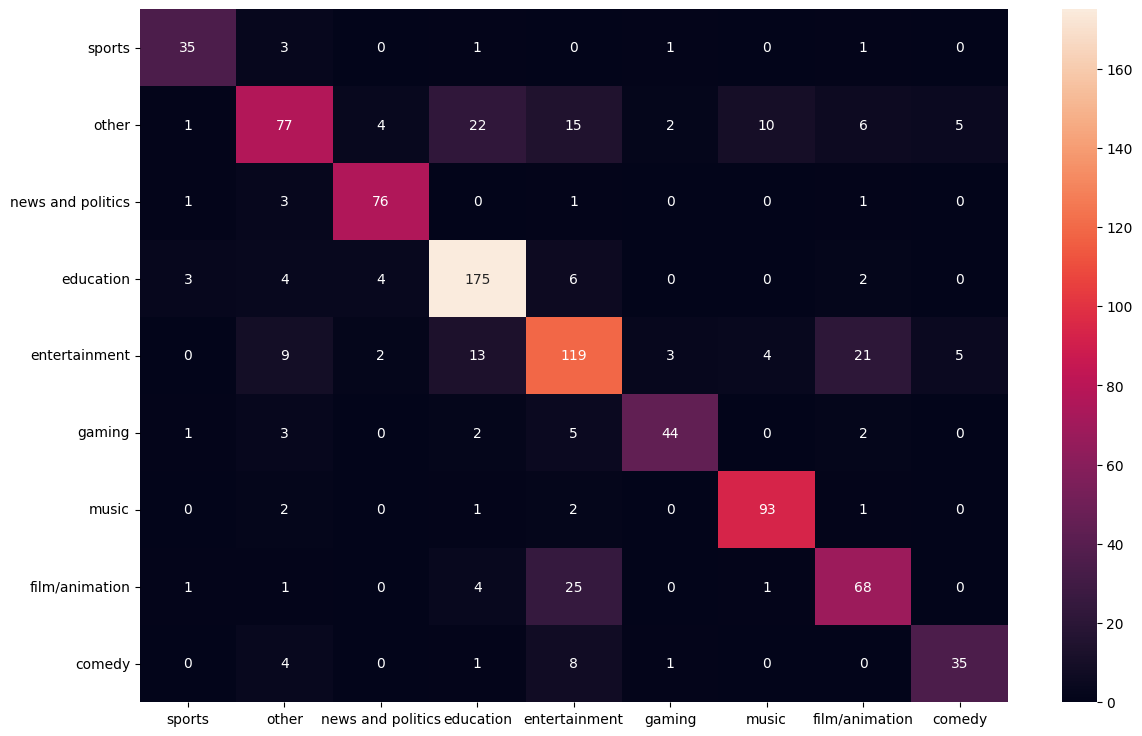

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14,9))
sns.heatmap(cm,annot=cm,xticklabels=categories,yticklabels=categories,fmt='.5g')
plt.show()

In [ ]:
test_data["category"].value_counts()

education            194
entertainment        176
other                142
film/animation       100
music                 99
news and politics     82
gaming                57
comedy                49
sports                41
Name: category, dtype: int64

In [ ]:
import pickle
with open('word_category_probabilities.pkl', 'wb') as fp:
    pickle.dump(word_category_probabilities, fp)

In [ ]:
with open('vocabulary_model_0.pkl', 'wb') as fp:
    pickle.dump(vocabulary, fp)

In [ ]:
with open('prior_probabilities.pkl', 'wb') as fp:
    pickle.dump(prior_probabilities , fp)

In [ ]:
import os
# Append the directory to your python path using os
os.chdir('/content/drive/MyDrive/Youtube_video_classifier')


In [ ]:
from Helper_functions import get_video_data

In [ ]:
#Paste the path of the video
url = 'https://www.youtube.com/watch?v=fAREvqzrh9Y'

In [ ]:
import pandas as pd
import re

In [ ]:
def predict_category(url):
  details = get_video_data(url)
  df = pd.DataFrame(data=[details],columns=["video_id","category_Id","category","category_label","title","description","tags","viewCount","likeCount","dislikeCount","commentCount","video_comments"])
  df.loc[:,('tags')]=str(df.loc[:,('tags')])
  category = df["category"][0]
  if pd.isnull(df["description"][0]):
    return None , category
  df=extract_columns(df) #removing unnecessary columns
  df = preprocessing(df)
  predicted_category = predict(df["description_with_tags"][0])
  return predicted_category , category


In [ ]:
predicted_category , category = predict_category(url)

In [1]:
if not predicted_category: print("No description is given for the video")
else : print(f"The category predicted by the model using description and tags is : {predicted_category}")
print(f"The actual category of the video is : {category} (from youtube data)")

The category predicted by the model using description and tags is : music
The actual category of the video is : music (from youtube data)
